In [50]:
#import the necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [51]:
#Load the dataset
data=pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\TrafficTelligence Advanced Traffic Volume Estimation With Machine Learning\Dataset\traffic volume.csv')

In [52]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [53]:
data.shape

(48204, 8)

In [54]:
data.dtypes

holiday            object
temp              float64
rain              float64
snow              float64
weather            object
date               object
Time               object
traffic_volume      int64
dtype: object

In [55]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [56]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [57]:
data['holiday'].fillna('None',inplace=True)

In [58]:
from collections import Counter

In [59]:

data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)


In [60]:
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [61]:
data['weather'].fillna('Clouds',inplace=True)

In [62]:
data.isnull().sum()

holiday           0
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64

In [63]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [64]:
le = LabelEncoder()

In [65]:
data['weather'] = le.fit_transform(data['weather'])

In [66]:
data['holiday'] = le.fit_transform(data['holiday'])

In [67]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,7,288.28,0.0,0.0,1,02-10-2012,09:00:00,5545
1,7,289.36,0.0,0.0,1,02-10-2012,10:00:00,4516
2,7,289.58,0.0,0.0,1,02-10-2012,11:00:00,4767
3,7,290.13,0.0,0.0,1,02-10-2012,12:00:00,5026
4,7,291.14,0.0,0.0,1,02-10-2012,13:00:00,4918


In [68]:
# spliiting the date column into year,month,day
data[["day", "month", "year"]] = data["date"].str.split("-", expand = True)

In [69]:
# spliiting the date column into year,month,day
data[["hours", "minutes", "seconds"]] = data["Time"].str.split(":", expand = True)

In [70]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [71]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,7,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,7,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,7,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,7,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,7,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [72]:
#correlations of columns
corr=data.corr()

<Axes: >

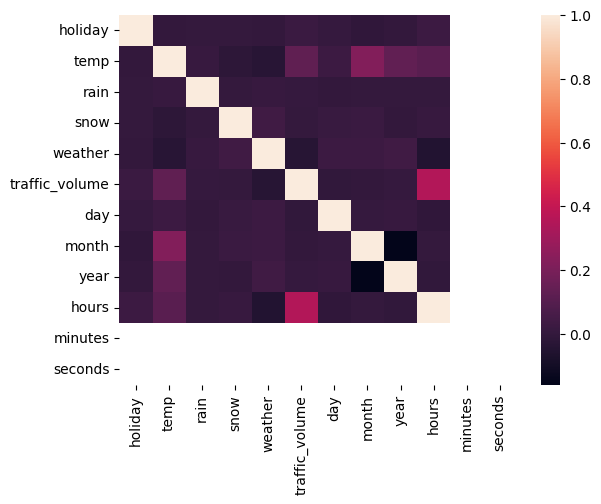

In [73]:
sns.heatmap(corr)

c:\python3_11_2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


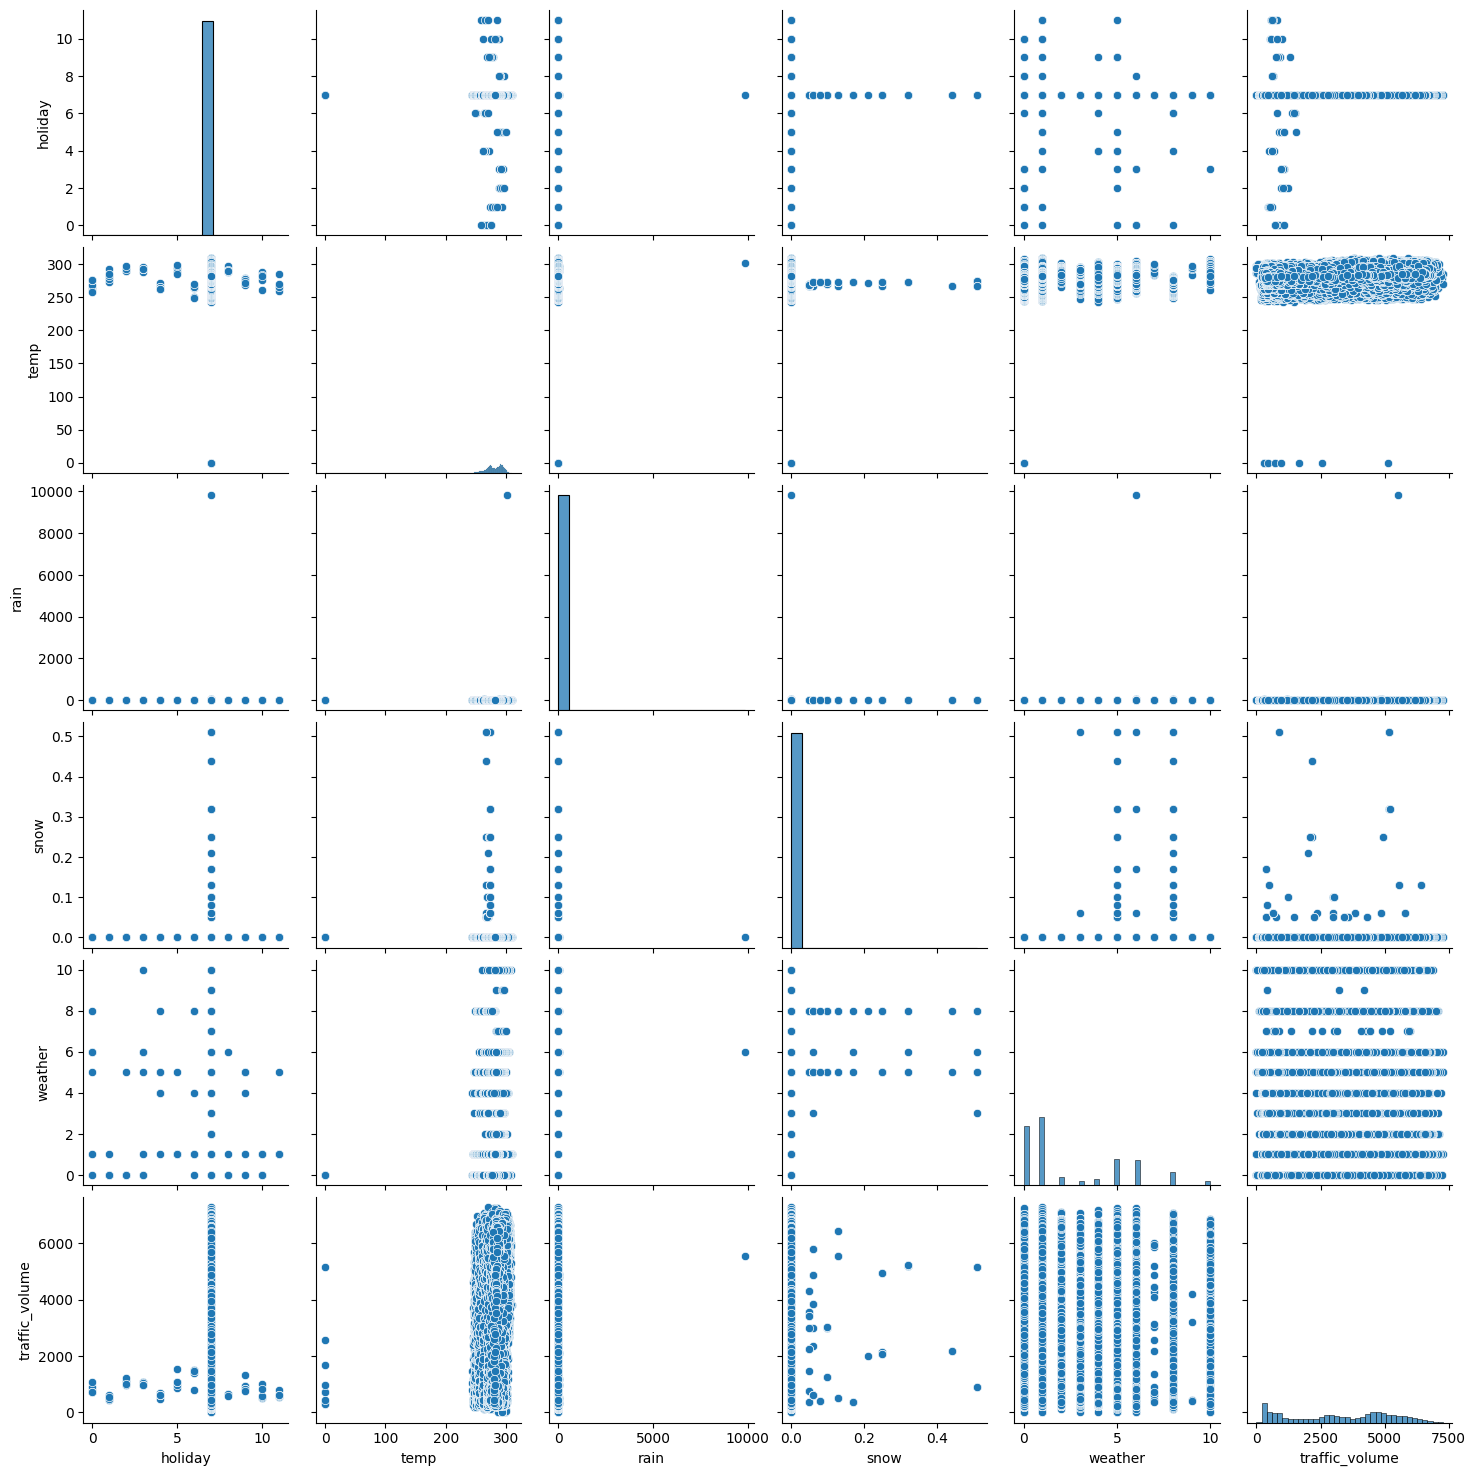

In [74]:
sns.pairplot(data)


<Axes: >

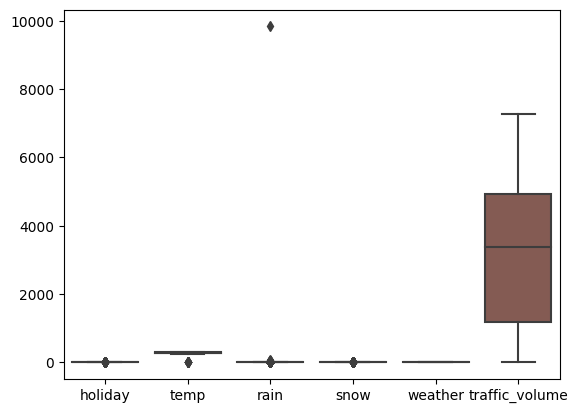

In [75]:
sns.boxplot(data)

In [76]:
#separating dependant and independant features
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'],axis=1)

In [77]:
names = x.columns

In [78]:
from sklearn.preprocessing import scale

In [79]:
x = scale(x)

In [80]:
x  = pd.DataFrame(x,columns=names)

In [81]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [82]:
# training and testing model
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [83]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [84]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()


In [85]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [86]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [87]:
y_1 = lin_reg.predict(x_test)
y_2 = Dtree.predict(x_test)
y_3 = Rand.predict(x_test)
y_4 = svr.predict(x_test)
y_5 = XGB.predict(x_test)

In [88]:
from sklearn import metrics

In [89]:
# for train set
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.517285423636855
1.0
0.9747072068468926
-12.18810423138228
0.8472604817696772


In [90]:
# for test set
print(metrics.r2_score(y_1,y_test))
print(metrics.r2_score(y_2,y_test))
print(metrics.r2_score(y_3,y_test))
print(metrics.r2_score(y_4,y_test))
print(metrics.r2_score(y_5,y_test))

-5.399396398322171
0.6940592265311616
0.803421893508097
-11.972215715232423
0.8065613781045625


In [91]:
# choosing random as it has higest r-score
#RMSE values
MSE = metrics.mean_squared_error(y_3,y_test)

In [92]:
np.sqrt(MSE)

797.7742642865852

In [93]:
import pickle

In [94]:
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))

In [95]:
y_s=Rand.predict([[0.015856,	0.530485,	-0.007463,	-0.027235,	-0.566452,	-1.574903,	1.02758	,-1.855294,	-0.345548,	0.0,0.0]])

c:\python3_11_2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [96]:
y_s

array([5260.07])